# Annotation


```{dropdown} <i class="fas fa-brain"></i>&nbsp;&nbsp;&nbsp;Key takeaways

:::{card}
:link: surface-protein-annotation-key-takeaway-1
:link-type: ref
ADT data annotation improves cell identification, especially for immune cells, by complementing RNA data with surface protein markers.
:::

```


<!-- START ENV-SETUP -->
``````{dropdown} <i class="fa-solid fa-gear"></i>   Environment setup
`````{tab-set}

````{tab-item} Steps
```{include} ../_static/default_text_env_setup.md
```
````

````{tab-item} yml
```{literalinclude} surface_protein.yml
:language: yaml
```
````

`````
``````
<!-- END ENV-SETUP -->

(surface-protein-annotation-key-takeaway-1)=
## Motivation

Similar to RNA data, it is possible to annotate the ADT data based on surface protein markers.
This can be very beneficial for the annotation of cells that are difficult to annotate in the RNA space such as immune cells.
For example, although sequenced immune cells usually include CD45 cells, the CD45 gene is not always highly expressed and additional marker genes are used for the annotation.
Even with the additional information these other markers provide, this approach may still lack resolution and power.
This can be mitigated by annotating (additionally) on the ADT level.

The general annotation workflow makes use of the same functions as for RNA and no ADT specific functions are required.

## Manual annotation

In [1]:
import scanpy as sc

# setting visualization parameters
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [2]:
adata = sc.read(
    "cite_preprocessed.h5ad",
    backup_url="https://figshare.com/ndownloader/files/42569866",
)

  0%|          | 0.00/309M [00:00<?, ?B/s]

First, we check the expression of CD45. CD45 is one of the most abundant proteins in the T-cell plasma membrane and required for TCR signaling. It activates Lck, which in turn is required to phosphorylate the TCR complex {cite}`Courtney2019`.

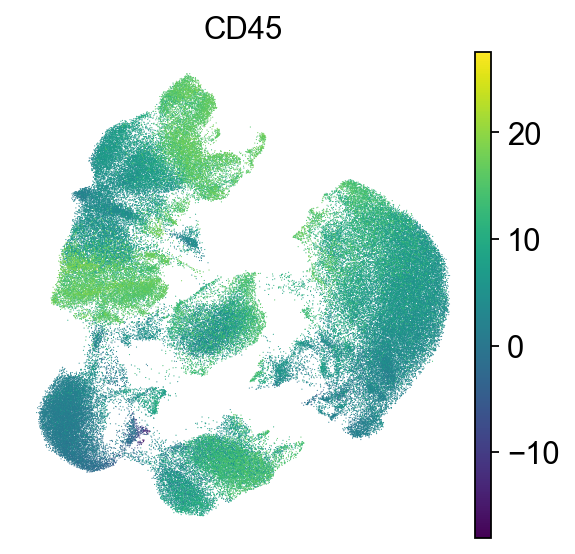

In [3]:
sc.pl.umap(adata, frameon=False, color="CD45")

The measured ADTs use a slightly different nomenclature due to name clashes with RNA genes. The `var_names_make_unique` function was used to separate gene names from protein names and the proteins might have `-1` suffixes.
We look up an example gene name (CD38) to exemplary find the exact nomenclature in our variable names:

In [4]:
adata.var[adata.var.gene_ids.str.contains("CD38")]

gene_ids     feature_types  n_cells_by_counts  mean_counts  \
CD38-1     CD38  Antibody Capture             116434    52.892693   

        log1p_mean_counts  pct_dropout_by_counts  total_counts  \
CD38-1           3.986995                4.57481     6453755.0   

        log1p_total_counts  
CD38-1           15.680173

We cluster the cells with a relatively low resolution to start with and similarly to RNA annotation, it is possible to increase the resolution for more fine-grained annotations.

In [5]:
sc.tl.leiden(adata, resolution=0.3)

In [6]:
sc.tl.rank_genes_groups(adata, groupby="leiden")

To check which surface markers are present in which cell type, we use the scanpy rank genes groups function. We can already identify clusters 1,2 and 11 as T cell populations by CD3 expression, and cluster 4 as B cells by CD19 expression.

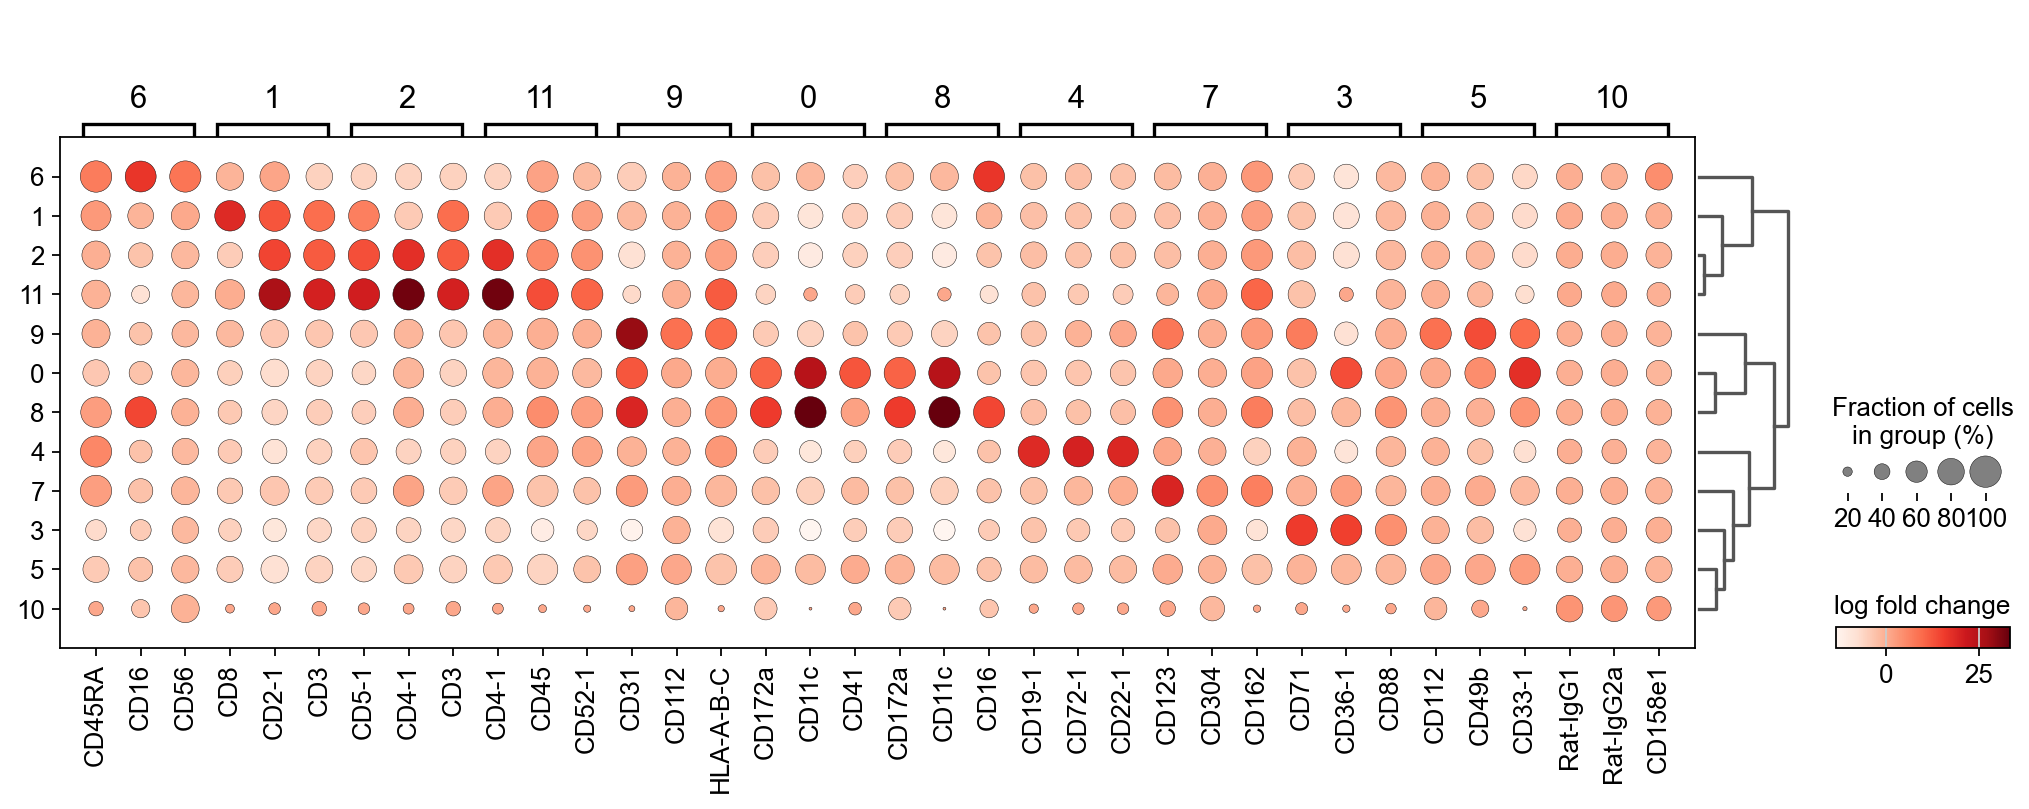

In [7]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=3, values_to_plot="logfoldchanges")

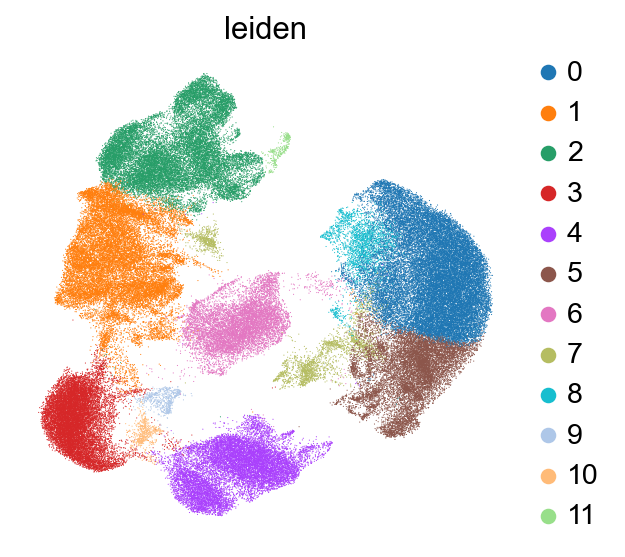

In [8]:
sc.pl.umap(adata, color="leiden")

We'll check a few known markers for major immune cell types.

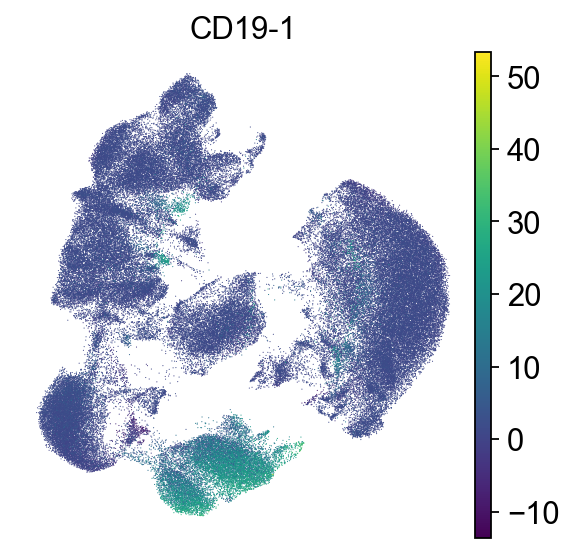

In [9]:
# B cells
sc.pl.umap(adata, frameon=False, color=["CD19-1"])

As could be seen in the dotplot, cluster 4 expresses CD19 which is a B cell marker while 1 and 2 express CD3, which is a T cell marker.

Let's look into the T cells in more detail and separate them into CD4 and CD8 cells.

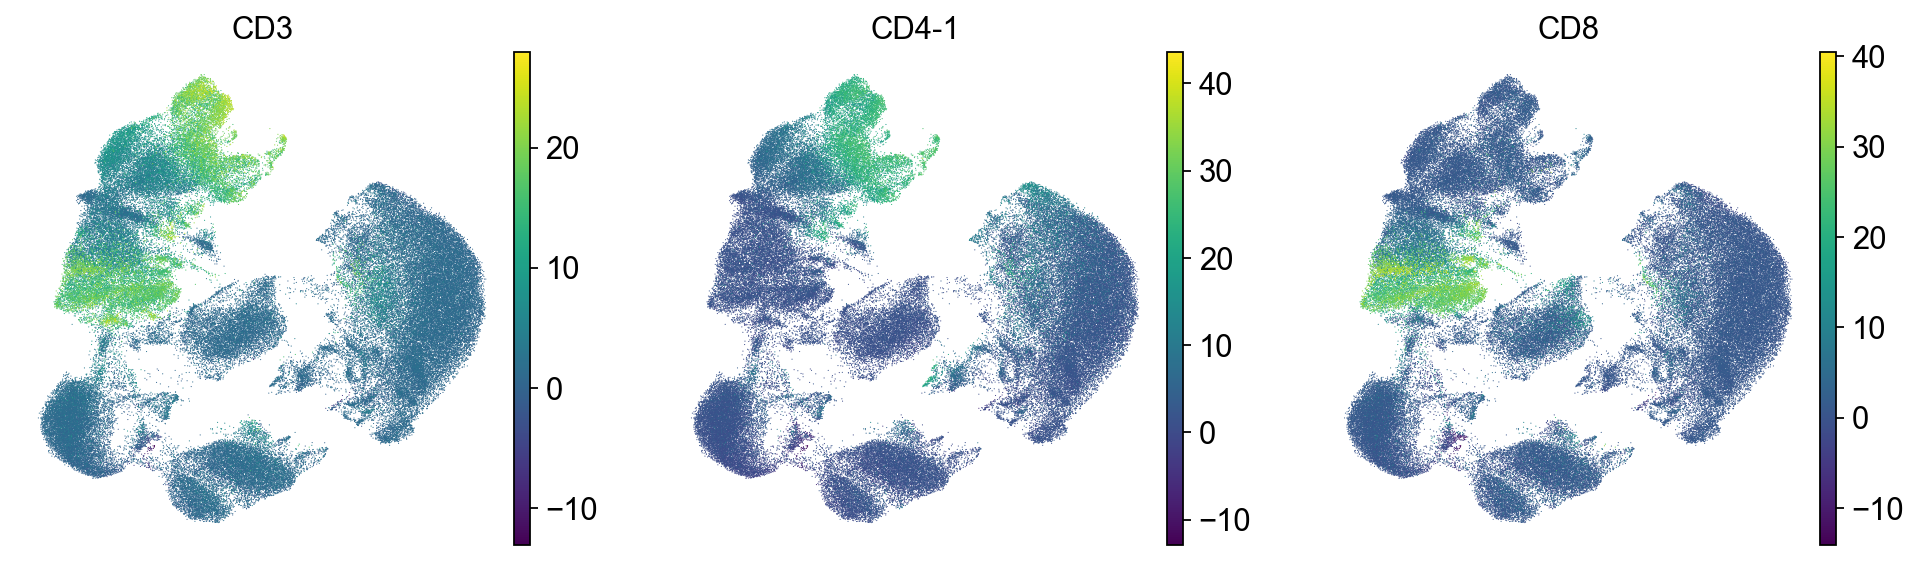

In [10]:
# T cells
sc.pl.umap(adata, color=["CD3", "CD4-1", "CD8"])

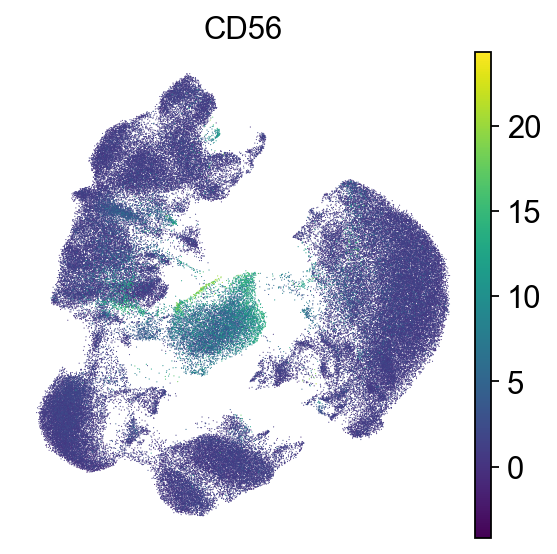

In [11]:
# NKT cells are CD3+ and CD56+
# NK cells are CD3- and CD56+
sc.pl.umap(adata, color=["CD56"], frameon=False)

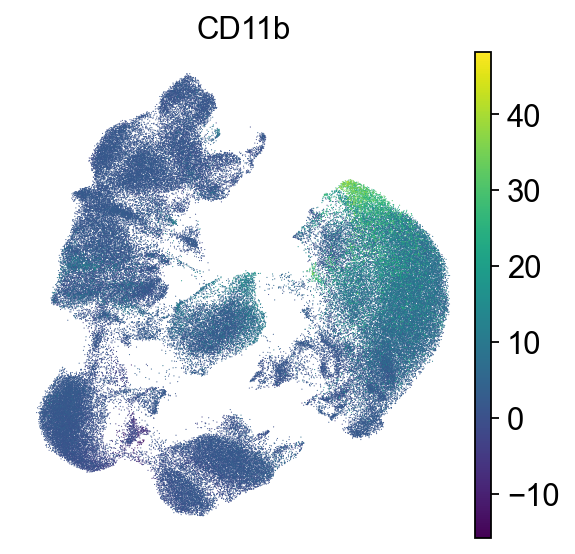

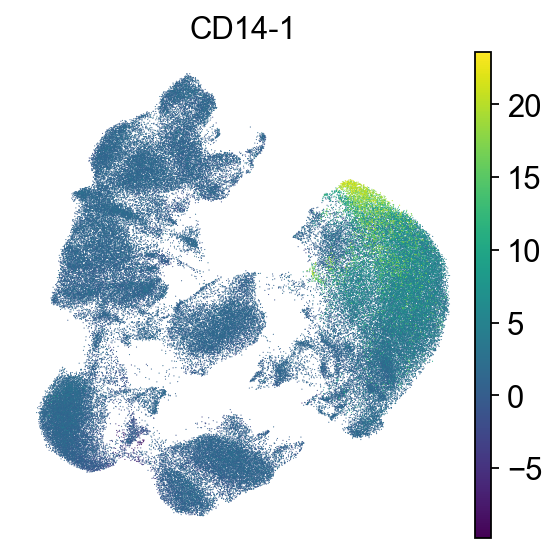

In [12]:
# Myeloid cells

sc.pl.umap(adata, color=["CD11b"], frameon=False)
sc.pl.umap(adata, color=["CD14-1"], frameon=False)

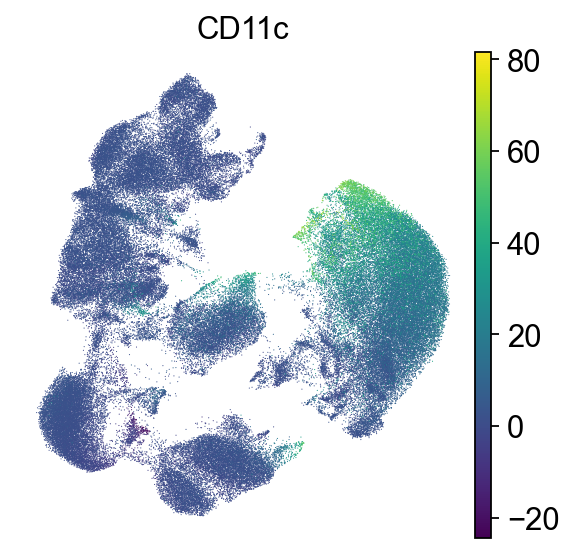

In [13]:
# Dendridic
sc.pl.umap(adata, color=["CD11c"], frameon=False)

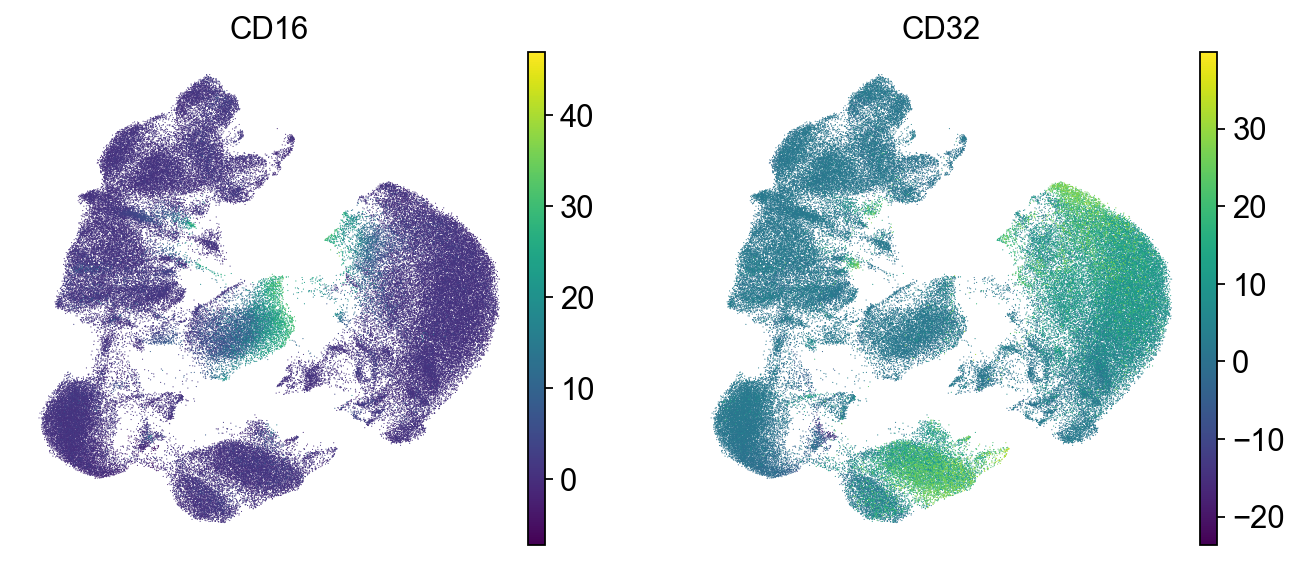

In [14]:
# Neutrophil
sc.pl.umap(adata, color=["CD16", "CD32"], frameon=False)

In [15]:
adata

AnnData object with n_obs × n_vars = 120502 × 136
    obs: 'donor', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'outliers', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'batch_colors', 'donor_colors', 'neighbors', 'pca', 'umap', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_isotypes', 'X_pca', 'X_pcahm', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Automated annotation

It is technically possible to use cell type classifiers trained on ADT data and to map against ADT reference datasets. However, ADT specific methods are sparse if not non-existent, and we refer to the RNA annotation chapter for methodological details.

## References

```{bibliography}
:filter: docname in docnames
```

## Contributors

We gratefully acknowledge the contributions of:

### Authors

* Daniel Strobl
* Ciro Ramírez-Suástegui

### Reviewers

* Lukas Heumos
* Anna Schaar